In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/TC_dataset.csv')

In [3]:
dataset.head()

,Ni,Cu,Fe,Cr,Mo,Nb,Ta,Mn,Si,Co,...,Ti,Zr,W,V,C,B,P,S,TT,TC
0,0.0,0.88,0.0,0.0,0.08,0.0,0.04,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,381.481
1,0.0,0.88,0.0,0.0,0.08,0.0,0.04,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,371.330
2,0.0,0.88,0.0,0.0,0.08,0.0,0.04,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200,367.570
3,0.0,0.88,0.0,0.0,0.08,0.0,0.04,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300,365.120
4,0.0,0.88,0.0,0.0,0.08,0.0,0.04,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400,357.160


In [4]:
dataset. columns

Index(['Ni', 'Cu', 'Fe', 'Cr', 'Mo', 'Nb', 'Ta', 'Mn', 'Si', 'Co', 'Al', 'Mg',
       'Ti', 'Zr', 'W', 'V', 'C', 'B', 'P', 'S', 'TT', 'TC'],
      dtype='object')

In [5]:
dataset.describe()

,Ni,Cu,Fe,Cr,Mo,Nb,Ta,Mn,Si,Co,...,Ti,Zr,W,V,C,B,P,S,TT,TC
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.00000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,0.250751,0.106619,0.268089,0.171698,0.031321,0.002936,0.00362,0.004022,0.006953,0.076094,...,0.006874,0.000002,0.005710,0.000575,0.001619,0.000039,0.000059,0.000030,453.768657,74.082545
std,0.245799,0.285979,0.304700,0.093705,0.028605,0.009330,0.01035,0.003449,0.006621,0.171588,...,0.011996,0.000007,0.014079,0.001317,0.001963,0.000093,0.000134,0.000072,310.593923,114.347496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,11.010000
25%,0.002460,0.000000,0.001522,0.146390,0.008000,0.000000,0.00000,0.000030,0.000300,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,18.981500
50%,0.094820,0.000000,0.107085,0.175550,0.020000,0.000000,0.00000,0.003600,0.005860,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000700,0.000000,0.000000,0.000000,400.000000,27.567000
75%,0.469160,0.024940,0.646175,0.211000,0.054560,0.000000,0.00000,0.006030,0.010280,0.034250,...,0.000700,0.000000,0.000000,0.000000,0.002630,0.000000,0.000000,0.000000,700.000000,35.873500
max,0.657200,0.940000,0.940000,0.316420,0.087000,0.034000,0.04000,0.012160,0.023350,0.626910,...,0.031000,0.000030,0.049660,0.004000,0.005920,0.000300,0.000360,0.000260,1000.000000,403.050000


In [6]:
#Import required modules
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import sklearn as sk
import numpy as np
from decimal import *
import math
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import sklearn.metrics
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 0)

In [7]:
rand_state = 1    # Shuffle the dataset
train_dataset = dataset.sample(frac=0.9,random_state=rand_state)
test_dataset = dataset.drop(train_dataset.index)

In [8]:
train_stats = train_dataset.describe()
train_stats.pop("TC")
train_stats = train_stats.transpose()
# Stats and distribution of testing data
test_stats = test_dataset.describe()
test_stats.pop("TC")
test_stats = test_stats.transpose()
# Define target properties in training set
y_train_TC = train_dataset.pop("TC")      # thermalConductivity

# Define target properties in testing set
y_test_TC = test_dataset.pop("TC")      # C11

# Normalization
def norm_train(x):
  return (x - train_stats['mean']) / train_stats['std']
X_train_norm = norm_train(train_dataset)
X_test_norm = norm_train(test_dataset)


In [9]:
GBR=GradientBoostingRegressor(learning_rate= 0.15, max_depth= 4, n_estimators= 300, subsample=0.4, min_samples_split=2, min_samples_leaf=1)

# Fit regression model
model_TC = GBR.fit(X_train_norm, y_train_TC)

#Choose metrics. Check the accuracy of the prediction

y_predict_train_TC = model_TC.predict(X_train_norm).flatten()

mae_train_TC = sklearn.metrics.mean_absolute_error(y_predict_train_TC, y_train_TC, multioutput='uniform_average')
mse_train_TC = sklearn.metrics.mean_squared_error(y_predict_train_TC, y_train_TC, multioutput='uniform_average', squared=True)
R2_train_TC = sklearn.metrics.r2_score(y_predict_train_TC, y_train_TC)
rmse_train_TC = math.sqrt(mse_train_TC)

print('Metrics for C44 calculation')
print('\n')
print('MAE_train = ', round(mae_train_TC,3))
print('MSE_train = ', round(mse_train_TC,3))
print('R^2_train = ', round(R2_train_TC,3))
print('RMSE_train = ', round(rmse_train_TC,3))
print('\n')

y_predict_TC = model_TC.predict(X_test_norm).flatten()

#Choose metrics. Check the accuracy of the prediction

mae_test_TC = sklearn.metrics.mean_absolute_error(y_predict_TC, y_test_TC, multioutput='uniform_average')
mse_test_TC = sklearn.metrics.mean_squared_error(y_predict_TC, y_test_TC, multioutput='uniform_average', squared=True)
R2_test_TC = sklearn.metrics.r2_score(y_predict_TC, y_test_TC)
rmse_test_TC = math.sqrt(mse_test_TC)

print('MAE_test = ', round(mae_test_TC,3))
print('MSE_test = ', round(mse_test_TC,3))
print('R^2_test = ', round(R2_test_TC,3))
print('RMSE_test = ', round(rmse_test_TC,3))

Metrics for C44 calculation


MAE_train =  1.805
MSE_train =  66.798
R^2_train =  0.995
RMSE_train =  8.173


MAE_test =  2.059
MSE_test =  9.558
R^2_test =  0.999
RMSE_test =  3.092


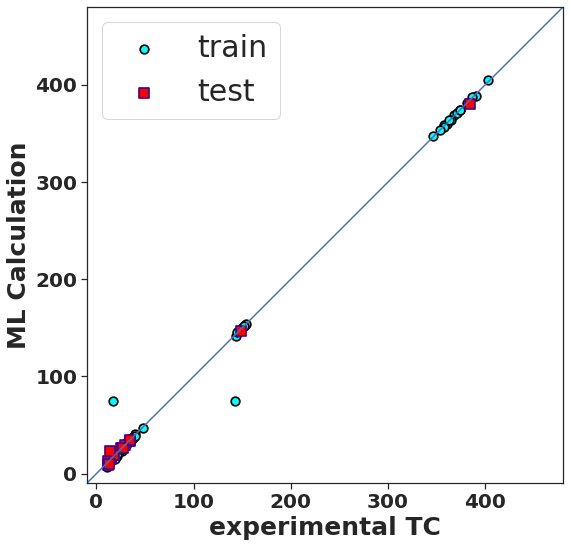

In [20]:
#Compare predicted and true values
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(8,8)
a = plt.axes(aspect='equal')
#plt.scatter(y_test, y_predict, marker="s", label="test", s = 100, facecolors='aqua', edgecolors='indigo', linewidth = 1.7)
plt.scatter(y_train_TC, y_predict_train_TC, marker="o", label="train", s = 75, facecolors='aqua', edgecolors='black', linewidth = 1.7)
plt.scatter(y_test_TC, y_predict_TC, marker="s", label="test", s = 100, facecolors='red', edgecolors='indigo', linewidth = 1.7)
plt.legend(fontsize=14)
plt.xticks(fontsize=20,fontweight ='bold')
plt.yticks(fontsize=20,fontweight ='bold')
plt.xlabel('experimental TC', fontsize=25,fontweight ='bold')
plt.ylabel('ML Calculation', fontsize=25,fontweight ='bold')
lims = [-10,480]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
fontsize = 30
plt.legend(loc="upper left", frameon=True, fontsize=fontsize)
plt.tight_layout()
#plt.savefig('E_form.png', dpi=300)
plt.show()

In [11]:
dataset1 = pd.read_csv('new_steel.csv')

In [12]:
df_vs0 = dataset1[['Ni', 'Cu', 'Fe', 'Cr', 'Mo', 'Nb', 'Ta', 'Mn', 'Si', 'Co', 'Al', 'Mg',
       'Ti', 'Zr', 'W', 'V', 'C', 'B', 'P', 'S', 'TT']]

In [13]:
# Normalization of features for calculating C44
X_vs = norm_train(df_vs0)

In [14]:
E_pred = model_TC.predict(X_vs)

In [15]:
df_vs0['TC'] = E_pred

In [16]:
print(df_vs0)

        Ni  Cu     Fe     Cr      Mo     Nb  Ta      Mn      Si      Co     Al  Mg      Ti  Zr  W  V  C  B  P  S    TT         TC
0   0.5458  0   0.175  0.174  0.0317  0.051  0   0.0014  0.0017  0.0045  0.005  0   0.0099  0   0  0  0  0  0  0  25    10.904310
1   0.5458  0   0.175  0.174  0.0317  0.051  0   0.0014  0.0017  0.0045  0.005  0   0.0099  0   0  0  0  0  0  0  100   11.202639
2   0.5458  0   0.175  0.174  0.0317  0.051  0   0.0014  0.0017  0.0045  0.005  0   0.0099  0   0  0  0  0  0  0  200   12.334340
3   0.5458  0   0.175  0.174  0.0317  0.051  0   0.0014  0.0017  0.0045  0.005  0   0.0099  0   0  0  0  0  0  0  300   15.411996
4   0.5458  0   0.175  0.174  0.0317  0.051  0   0.0014  0.0017  0.0045  0.005  0   0.0099  0   0  0  0  0  0  0  400   18.401503
5   0.5458  0   0.175  0.174  0.0317  0.051  0   0.0014  0.0017  0.0045  0.005  0   0.0099  0   0  0  0  0  0  0  500   21.009895
6   0.5458  0   0.175  0.174  0.0317  0.051  0   0.0014  0.0017  0.0045  0.005  0   0.0099

In [17]:
array = dataset.values
X = array[:,0:20]
Y = array[:,21]

In [18]:
from sklearn.model_selection import RepeatedKFold
GBR2 = GradientBoostingRegressor(learning_rate= 0.01, max_depth= 8, n_estimators= 600, subsample= 0.3)
cv = RepeatedKFold(n_splits=10, random_state=1)
np.mean(cross_val_score(GBR2, X, Y, cv=cv))

0.8899218538519251